In [1]:
# IMPORT MODULES
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import numpy as np 
import datetime

# Køge Bugt Central

## Terminus Position

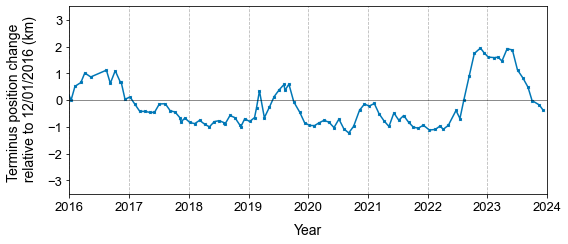

In [2]:
# Plot a timeseries of terminus position at Koge Bugt C between 2016 and 2024
KOGE_BUGT_C = pd.read_csv(r"R:/KOGE_BUGT/github/data/MaQiT_terminus_position_change/koge_bugt_C_maqit_output_2015_2024.csv", skiprows=1, parse_dates= {"Date" : ["Year","Month","Day"]})
KOGE_BUGT_C.sort_values(by='Date', ascending = True, inplace = True) 
KBC_january_2016_index = KOGE_BUGT_C.index[KOGE_BUGT_C['Date'] == '2016-01-12'].tolist()
#print(f"Index of the row with the first observation of 2016 is: {KBC_january_2016_index[0]}")

KOGE_BUGT_C['TP_RELATIVE_TO_JAN_2016'] = KOGE_BUGT_C['Terminus Position on flowline'] - KOGE_BUGT_C['Terminus Position on flowline'].iloc[11]
KBC_jan_2016 = KOGE_BUGT_C['Date'][11]
KBC_jan_2016_label = KBC_jan_2016.strftime('%d/%m/%Y') 
#print(f"The date label for the first observation of 2016 is: {KBC_jan_2016_label}")

plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 3.5))
plt.plot(KOGE_BUGT_C['Date'], KOGE_BUGT_C['TP_RELATIVE_TO_JAN_2016']/1000, color='#0077b6', linewidth=1.5)
plt.scatter(KOGE_BUGT_C['Date'], KOGE_BUGT_C['TP_RELATIVE_TO_JAN_2016']/1000, color='#0077b6', s=6, marker='x')
plt.xlabel('Year', labelpad=10, fontsize=14)
plt.ylabel(f'Terminus position change \n relative to {KBC_jan_2016_label} (km)', labelpad=10, fontsize=14)
plt.ylim(-3.5, 3.5)
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2024-01-01'))
plt.axhline(0, color='black', linewidth=0.5, linestyle='-', alpha=0.9)
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', labelsize=13)
plt.tight_layout()
plt.show() 

## Ice Velocity

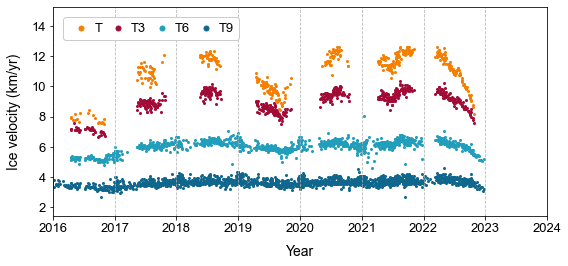

In [3]:
# Process the ITS_LIVE CSV OUTPUTS for KOGE BUGT C
KBC_folder_path = "R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/KOGE_BUGT_C/"

# For each CSV file, remove data where the seperation time is greater than 12 days and convert the mid_date to %Y-%m-%d' format.
for filename in os.listdir(KBC_folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(KBC_folder_path, filename)
        df = pd.read_csv(file_path)
        df_filtered = df[df[' dt (days)'] <= 12] # Remove any rows where the seperatime time is greater than 12 days. 
        df_filtered['mid_date'] = pd.to_datetime(df_filtered['mid_date']).dt.strftime('%Y-%m-%d') # Convert the mid_date to %Y-%m-%d' format.
        df_filtered.to_csv(file_path, index=False)

# Define the file paths for each of the ITS_LIVE CSV files
KBC_file_paths = {'T': 'R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/KOGE_BUGT_C/lat_65.17116504_lon_-41.15385223.csv',
    'T3': 'R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/KOGE_BUGT_C/lat_65.19132369_lon_-41.19459264.csv',
    'T6': 'R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/KOGE_BUGT_C/lat_65.21020111_lon_-41.23875782.csv',
    'T9': 'R:/KOGE_BUGT/github/data/ITS_LIVE_velocity/KOGE_BUGT_C/lat_65.22990213_lon_-41.28086612.csv'}

# Define the color to be used to represent each of the sampling locations. 
colors = {'T': '#f77f00', 'T3': '#a30b37', 'T6': '#219ebc', 'T9': '#10678e'}

# Plot a timeseries of ice surface velocity at Koge Bugt C between 2016 and 2024
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 3.8))
for location, path in KBC_file_paths.items():
    df = pd.read_csv(path)
    df['mid_date'] = pd.to_datetime(df['mid_date']).dt.date  
    plt.scatter(df['mid_date'], df[' v [m/yr]']/1000, marker='o', linestyle='-', label=f'{location}', s=4, color=colors[location])
plt.ylabel('Ice velocity (km/yr)', labelpad=10, fontsize=14)
plt.xlabel('Year', labelpad=10, fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2024-01-01'))
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', labelsize=13)
plt.ylim(1.4, 15.3)
plt.legend(loc='upper left', ncol=5, frameon=True, framealpha=1, fontsize=13, markerscale=2.5, columnspacing=0.2, handletextpad=0.01, fancybox=True, borderaxespad = 0.8)
plt.tight_layout() 
plt.show()

## Ice Discharge

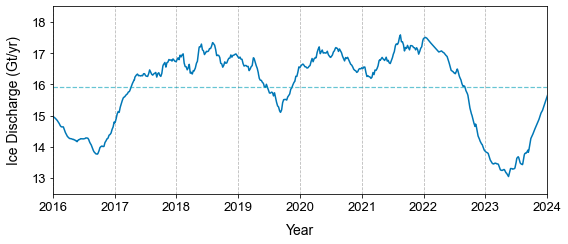

In [4]:
# Plot a timeseries of ice discharge from Koge Bugt C between 2016 and 2024
koge_bugt_c = pd.read_csv('R:/KOGE_BUGT/github/data/mankoff_2020_ice_discharge/koge_bugt_C_ice_discharge.csv')
koge_bugt_c['Date'] = pd.to_datetime(koge_bugt_c['Date'])

plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(8, 3.5))
plt.plot(koge_bugt_c['Date'], koge_bugt_c['Discharge'], color='#0077b6', linewidth=1.5)
plt.ylabel('Ice Discharge (Gt/yr)', labelpad=10, fontsize=14)
plt.xlabel('Year', labelpad=10, fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2024-01-01'))
plt.axhline(15.93, color='#009fb7', linestyle='--', linewidth=1.2, alpha=0.6) # Add a horizontal line for the mean ice discharge (2016-2024)
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', labelsize=13)
plt.ylim(12.5, 18.5)
plt.tight_layout()
plt.show() 